In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline
import nltk
import matplotlib.pyplot as plt

In [ ]:
#!pip install bert_score

## Load Models

In [2]:
m1 = pipeline("summarization", model="facebook/bart-large-cnn")
m2 = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")
m3 = pipeline("summarization", model="google/pegasus-cnn_dailymail")
m4 = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Define Articles

In [3]:
Article = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

## Summarize the Articles

In [4]:
s1 = m1(Article, max_length=130, min_length=30, do_sample=False)
s2 = m2(Article, max_length=130, min_length=30, do_sample=False)
s3 = m3(Article, max_length=130, min_length=30, do_sample=False)
s4 = m4(Article, max_length=130, min_length=30, do_sample=False)

In [5]:
summaries = list([s1,s2,s3,s4])

In [6]:
s = 1
for i in summaries:
  print("S",s, ":", i[0].get('summary_text'))
  s = s+1

S 1 : Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.
S 2 : Liana Barrientos, 39, has been married 10 times between 1999 and 2002 in New York, Westchester County, Long Island, New Jersey or the Bronx. On Friday, she pleaded not guilty to two criminal counts of "offering a false instrument for filing in the first degree" on the 2010 marriage license application. She is accused of being involved in an immigration scam.
S 3 : Liana Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree"<n>Prosecutors say the marriages were part of an immigration scam .
S 4 :  Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine 

# Evaluation


1.   BERT Score
2.   METEOR Score
3.   BLEU Score



Creating Data frame to store answer.

In [7]:
header = ["Precision", "Recall", "F1 Score", "METEOR", "BLEU" ]
ans = pd.DataFrame(columns = header, index=['M1','M2','M3','M4'])

In [8]:
ans

,Precision,Recall,F1 Score,METEOR,BLEU
M1,NaN,NaN,NaN,NaN,NaN
M2,NaN,NaN,NaN,NaN,NaN
M3,NaN,NaN,NaN,NaN,NaN
M4,NaN,NaN,NaN,NaN,NaN


## BERT Score

In [9]:
from bert_score import BERTScorer

In [10]:
scorer = BERTScorer(lang="en", model_type="bert-base-uncased")

In [11]:
i = 0
for summary in summaries:
  j = 0
  P, R, F1 = scorer.score([summary[0].get('summary_text')], [Article])
  ans.iloc[i,j] = P.mean().item()
  ans.iloc[i,j+1] = R.mean().item()
  ans.iloc[i,j+2] = F1.mean().item()
  i = i+1

In [12]:
ans

,Precision,Recall,F1 Score,METEOR,BLEU
M1,0.845326,0.48746,0.618348,NaN,NaN
M2,0.800241,0.53049,0.638025,NaN,NaN
M3,0.790937,0.449346,0.573102,NaN,NaN
M4,0.856211,0.50466,0.635028,NaN,NaN


## METEOR Score

In [13]:
from nltk.translate.meteor_score import meteor_score
nltk.download('wordnet')  # For synonym matching
nltk.download('omw-1.4')  # For improved WordNet integration

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
i = 0
for summary in summaries:
  ans.iloc[i, 3] = meteor_score([Article.split()], summary[0].get('summary_text').split())
  i = i+1

In [15]:
ans

,Precision,Recall,F1 Score,METEOR,BLEU
M1,0.845326,0.48746,0.618348,0.099406,NaN
M2,0.800241,0.53049,0.638025,0.125424,NaN
M3,0.790937,0.449346,0.573102,0.05382,NaN
M4,0.856211,0.50466,0.635028,0.112289,NaN


## BLEU Score

In [16]:
from nltk.translate.bleu_score import sentence_bleu

In [17]:
i = 0
for summary in summaries:
  ans.iloc[i, 4] = sentence_bleu([Article.split()], summary[0].get('summary_text').split())
  i = i+1

In [18]:
ans

,Precision,Recall,F1 Score,METEOR,BLEU
M1,0.845326,0.48746,0.618348,0.099406,0.000768
M2,0.800241,0.53049,0.638025,0.125424,0.003623
M3,0.790937,0.449346,0.573102,0.05382,0.00001
M4,0.856211,0.50466,0.635028,0.112289,0.001518


## Visualization

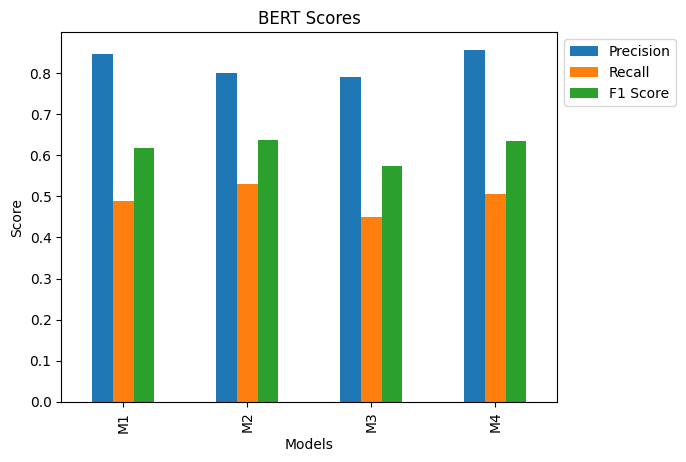

In [19]:
ans.drop(columns = {"METEOR", "BLEU"}).plot(kind='bar')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("BERT Scores")
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<Axes: title={'center': 'METEOR Score'}, xlabel='Models', ylabel='Score'>

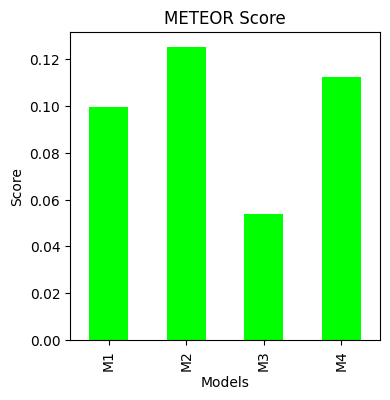

In [20]:
plt.figure(figsize=(4,4))
plt.title('METEOR Score')
plt.xlabel('Models')
plt.ylabel('Score')
ans['METEOR'].plot(kind = "bar", color = 'lime')

<Axes: title={'center': 'BLEU Score'}, xlabel='Models', ylabel='Score'>

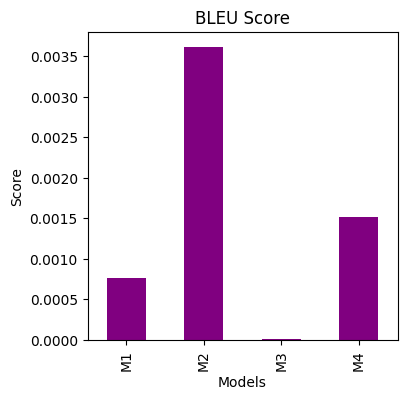

In [21]:
plt.figure(figsize=(4,4))
plt.title('BLEU Score')
plt.xlabel('Models')
plt.ylabel('Score')
ans['BLEU'].plot(kind = "bar", color = 'purple')

# Topsis

Functions to perform Topsis.

In [22]:
def normalize(mat, n, m):
  for j in range(m):
    sum = 0
    for i in range(n):
      sum = sum + mat[i][j] ** 2

    sum = sum ** 0.5
    for i in range(n):
      mat[i][j] = mat[i][j] / sum

  return mat

In [23]:
def multiply_weights(mat, w):
  for j in range(mat.shape[1]):
    for i in range(mat.shape[0]):
      mat[i][j] = mat[i][j] * int(w[j])
  return mat

In [24]:
def ideal_best_worst(mat, im):
  best = list()
  worst = list()
  for j in range(mat.shape[1]):
    if im[j] == '+':
      best.append(np.max(mat[:, j]))
      worst.append(np.min(mat[:, j]))
    else:
      worst.append(np.max(mat[:, j]))
      best.append(np.min(mat[:, j]))
  return best, worst

In [25]:
def performance_score(mat, best, worst):
  dist_best = (mat - best) ** 2
  dist_worst = (mat - worst) ** 2
  dw = []
  db = []
  for i in range(mat.shape[0]):
    dw.append(sum(dist_worst[i, :]) ** 0.5)
    db.append(sum(dist_best[i, :]) ** 0.5)
  dw = np.array(dw)
  db = np.array(db)
  dsum = dw + db
  ps = np.divide(dw, dsum)
  return ps

In [26]:
def topsis(data, weights, impacts):
  df = data
  df = df.drop(df.columns[0], axis=1)

  matrix = df.to_numpy()
  matrix = normalize(matrix, df.shape[0], df.shape[1])

  weights = weights.split(',')
  matrix = multiply_weights(matrix, weights)
  impacts = impacts.split(',')
  best, worst = ideal_best_worst(matrix, impacts)
  ps = performance_score(matrix, best, worst)  # performance score
  ranking = len(ps) - np.argsort(np.argsort(ps))

  data['Topsis Score'] = ps
  data['Rank'] = ranking

  return data

Define impacts and weights here.

In [27]:
impacts = "+,+,+,+,+"
weights = "1,1,1,1,1"

Perform Topsis

In [28]:
ans = topsis(ans, weights, impacts)

# Result

In [29]:
ans

,Precision,Recall,F1 Score,METEOR,BLEU,Topsis Score,Rank
M1,0.845326,0.48746,0.618348,0.099406,0.000768,0.291483,3
M2,0.800241,0.53049,0.638025,0.125424,0.003623,1.000000,1
M3,0.790937,0.449346,0.573102,0.05382,0.00001,0.000000,4
M4,0.856211,0.50466,0.635028,0.112289,0.001518,0.475114,2


Save file as csv:

In [30]:
# ans.to_csv("result_file")

<Axes: title={'center': 'Topsis Score'}, xlabel='Models', ylabel='Score'>

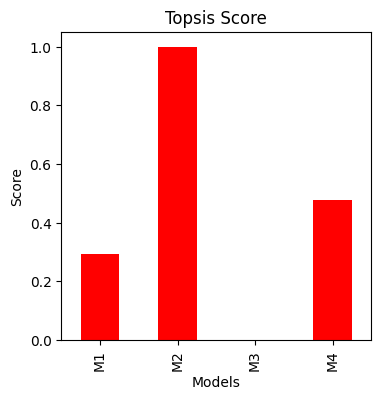

In [31]:
plt.figure(figsize=(4,4))
plt.title('Topsis Score')
plt.xlabel('Models')
plt.ylabel('Score')
ans['Topsis Score'].plot(kind = 'bar', color = 'red')

## Best Model:

In [32]:
ans[ans['Rank'] == 1]

,Precision,Recall,F1 Score,METEOR,BLEU,Topsis Score,Rank
M2,0.800241,0.53049,0.638025,0.125424,0.003623,1.0,1
